In [ ]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six

Problem 8: Linear movies

**Linear**

test error: double split

need to split data

In [1]:
import pandas as pd
import numpy as np

# help from: https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
rottenTom = df[['RottenTomatoes_User','RottenTomatoes']]

matrix = np.array(rottenTom.values, 'int')

# assign input and targ var
x = matrix[:,0]
y = matrix[:,1]

In [2]:
df.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

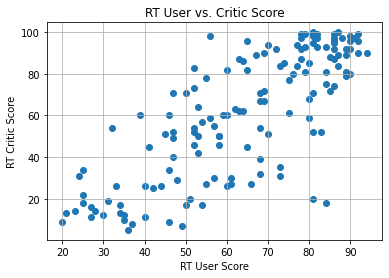

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('RT User vs. Critic Score')
plt.grid()
plt.show()

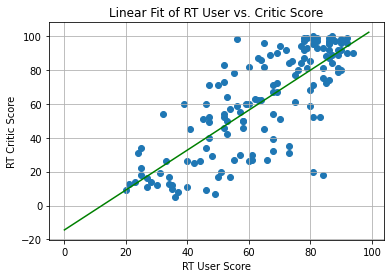

In [ ]:
# help from https://www.delftstack.com/howto/matplotlib/plot-numpy-linear-fit-matplotlib-python/
plt.scatter(x,y)
plt.ylabel('RT Critic Score')
plt.xlabel('RT User Score')
plt.title('Linear Fit of RT User vs. Critic Score')

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,100)
plt.plot(x_s,linear_model_fn(x_s),color="green")

plt.grid()
plt.show()

**Easy Linear**